**Step 1: Import Required Libraries**

In [3]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Step 2: Create Sample Data**

In [4]:
data = {
    "Region": ["North", "South", "East", "West", "North", "South", "East", "West", "North", "East"],
    "Item": ["Item1", "Item2", "Item3", "Item1", "Item2", "Item3", "Item1", "Item2", "Item3", "Item1"],
    "Order Date": pd.to_datetime([
        "2025-04-01", "2025-04-02", "2025-04-03", "2025-04-04", "2025-04-05",
        "2025-04-06", "2025-04-07", "2025-04-08", "2025-04-09", "2025-04-10"
    ])
}

df = pd.DataFrame(data)
df


,Region,Item,Order Date
0,North,Item1,2025-04-01
1,South,Item2,2025-04-02
2,East,Item3,2025-04-03
3,West,Item1,2025-04-04
4,North,Item2,2025-04-05
5,South,Item3,2025-04-06
6,East,Item1,2025-04-07
7,West,Item2,2025-04-08
8,North,Item3,2025-04-09
9,East,Item1,2025-04-10


This creates a mock dataset with 3 columns: Region, Item, and Order Date.

Order Date is converted to datetime format using pd.to_datetime().

**Step 3: Add Title and Dropdown Using Streamlit**

In [5]:
st.title("📊 Data Statistics Web App")

column_name = st.selectbox("Select a column:", ["Select", "Region", "Item", "Order Date"])


st.title(): sets the app's title.

st.selectbox(): creates a dropdown menu for column selection.

**Step 4: Function to Calculate Mean, Median, and Mode**

In [6]:
def calculate_stats(column_name):
    column_data = df[column_name]

    if column_name in ["Region", "Item"]:
        st.warning("Mean and Median are not applicable to categorical data. Showing only Mode.")
        return None, None, column_data.mode().iloc[0]

    elif np.issubdtype(column_data.dtype, np.datetime64):
        column_data_numeric = column_data.astype(np.int64)
        mean_val = pd.to_datetime(np.mean(column_data_numeric))
        median_val = pd.to_datetime(np.median(column_data_numeric))
        mode_val = column_data.mode().iloc[0]
        return mean_val, median_val, mode_val

    else:
        mean_val = column_data.mean()
        median_val = column_data.median()
        mode_val = column_data.mode().iloc[0]
        return mean_val, median_val, mode_val


This function checks the data type of the column:

If categorical, only mode() is calculated.

If datetime, converted to integers for calculation.

If numeric, standard calculations are done.

Uses pandas.Series.mode() to fix errors from scipy.stats.mode().

**Step 5: Run the Function if a Valid Column is Selected**

In [7]:
if column_name != "Select":
    mean_val, median_val, mode_val = calculate_stats(column_name)

    if mean_val is not None:
        st.success(f"**Mean:** {mean_val}")
        st.info(f"**Median:** {median_val}")
    st.warning(f"**Mode:** {mode_val}")


After user selects a column, call the function.

Display Mean, Median, and Mode using Streamlit's st.success, st.info, and st.warning.

**Step 6: Plot the Column Distribution**

KeyError: 'Select'

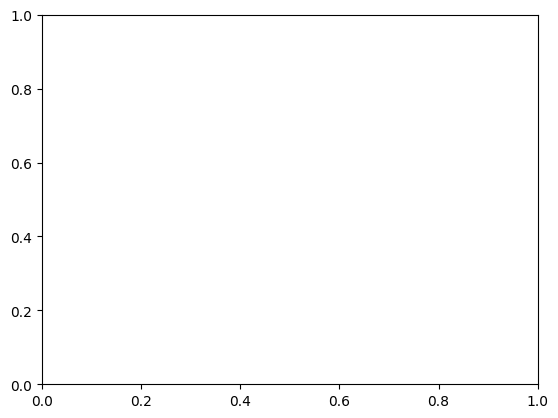

In [10]:
fig, ax = plt.subplots()

if np.issubdtype(df[column_name].dtype, np.datetime64):
        date_counts = df[column_name].value_counts().sort_index()
        ax.bar(date_counts.index, date_counts.values, color='skyblue', edgecolor='black')
        if mean_val is not None:
            ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
            ax.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
        ax.axvline(mode_val, color='orange', linestyle='dashed', linewidth=2, label='Mode')
        ax.set_title(f'Date Distribution of {column_name}')
        ax.set_xlabel("Date")
        ax.set_ylabel("Frequency")
        ax.legend()
        plt.xticks(rotation=45)

else:
    if column_name in ["Region", "Item"]:
            cat_counts = df[column_name].value_counts()
            ax.bar(cat_counts.index, cat_counts.values, color='lightgreen')
            ax.set_title(f"Category Distribution of {column_name}")
            ax.set_xlabel(column_name)
            ax.set_ylabel("Count")
    else:
            ax.hist(df[column_name], bins=10, alpha=0.7, color='blue')
            ax.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label='Mean')
            ax.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label='Median')
            ax.axvline(mode_val, color='y', linestyle='dashed', linewidth=2, label='Mode')
            ax.set_title(f'Distribution of {column_name}')
            ax.set_xlabel(column_name)
            ax.set_ylabel('Frequency')
            ax.legend()

st.pyplot(fig)


If the column is datetime:

Convert value counts into a bar plot of date frequency.

If it's categorical:

Use a bar chart of value counts.

If it's numeric:

Plot a histogram and overlay vertical lines for mean, median, and mode.

Finally, use st.pyplot(fig) to embed the matplotlib chart into the Streamlit app.